### Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Simple Linear Regression
Linear Regression is a supervised learning algorithm that models the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variable) denoted X.

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
# Read it first!
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.squeeze.html
# https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#numpy.newaxis

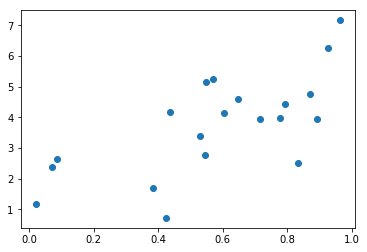

In [4]:
# Create some simple data
np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.randn(20)

#print(X)
#print(X.shape, X.squeeze().shape, y.shape)
plt.plot(X.squeeze(), y, 'o');

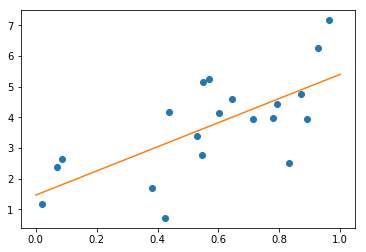

In [5]:
model = LinearRegression()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 100)[:, np.newaxis] # add a new dimestion
y_fit = model.predict(X_fit)

#print(X_fit)
plt.plot(X.squeeze(), y, 'o')
plt.plot(X_fit.squeeze(), y_fit);

### Regression: house price

In [6]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


In [7]:
df.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15     True
sqft_lot15        True
dtype: bool

In [8]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

In [9]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,3.165000e+03,3.165000e+03,3165.000000,3165.000000,3165.000000,3.165000e+03,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3164.000000,3164.000000
mean,4.645675e+09,5.354183e+05,3.381359,2.071564,2070.030964,1.524746e+04,1.434755,0.009795,0.244234,3.459084,7.615482,1761.024329,309.006635,1967.480885,94.638863,98077.137757,47.557908,-122.212364,1982.544564,13176.302465
std,2.853857e+09,3.808415e+05,0.895398,0.768327,920.106459,4.253820e+04,0.507771,0.098498,0.776188,0.682533,1.166191,815.906643,459.089397,28.094781,424.375685,54.169012,0.140785,0.139564,686.256670,25413.180755
min,1.000102e+06,7.500000e+04,0.000000,0.000000,380.000000,6.490000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.177500,-122.514000,620.000000,660.000000
25%,2.200500e+09,3.150000e+05,3.000000,1.500000,1430.000000,5.455000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1950.000000,0.000000,98032.000000,47.459800,-122.324000,1480.000000,5429.500000
50%,4.027701e+09,4.450000e+05,3.000000,2.000000,1910.000000,8.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1540.000000,0.000000,1969.000000,0.000000,98059.000000,47.572600,-122.226000,1830.000000,7873.000000
75%,7.355700e+09,6.400000e+05,4.000000,2.500000,2500.000000,1.122000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2150.000000,600.000000,1990.000000,0.000000,98117.000000,47.680400,-122.124000,2360.000000,10408.250000
max,9.839301e+09,5.350000e+06,8.000000,6.000000,8010.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,6720.000000,2620.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,425581.000000


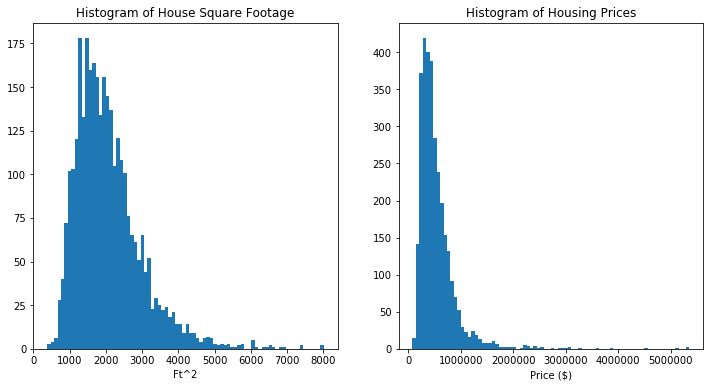

In [10]:
fig = plt.figure(figsize=(12, 6))
sqft = fig.add_subplot(121)
cost = fig.add_subplot(122)

sqft.hist(df.sqft_living, bins=80)
sqft.set_xlabel('Ft^2')
sqft.set_title("Histogram of House Square Footage")

cost.hist(df.price, bins=80)
cost.set_xlabel('Price ($)')
cost.set_title("Histogram of Housing Prices")

plt.show()

In [11]:
from statsmodels.formula.api import ols

In [12]:
# Ordinary Least Squares, http://students.brown.edu/seeing-theory/regression/index.html#first
# Reg = ols(‘Dependent variable ~ independent variable(s), dataframe).fit()

m = ols('price ~ sqft_living', df).fit() 
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     3126.
Date:                Tue, 25 Apr 2017   Prob (F-statistic):               0.00
Time:                        19:56:51   Log-Likelihood:                -44073.
No. Observations:                3165   AIC:                         8.815e+04
Df Residuals:                    3163   BIC:                         8.816e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.867e+04   1.18e+04     -5.808      

m = ols('price ~ sqft_living + bedrooms + grade + condition', df).fit()
print (m.summary())

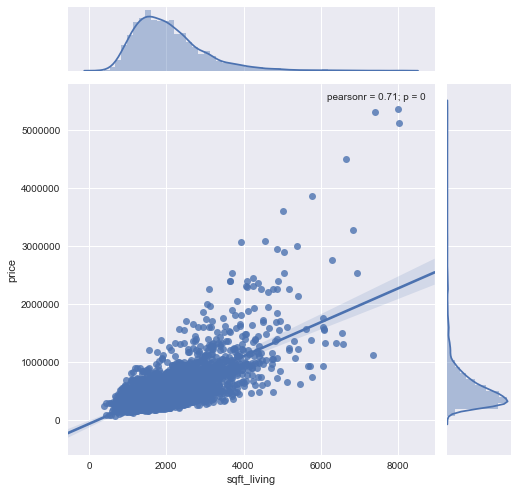

In [13]:
import seaborn # pip install seaborn

seaborn.jointplot(x="sqft_living", y="price", data=df, kind='reg', fit_reg=True, size=7)
plt.show()

### Visualizing linear relationships

In [14]:
help(seaborn.regplot)

Help on function regplot in module seaborn.linearmodels:

regplot(x, y, data=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=False, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None)
    Plot data and a linear regression model fit.
    
    There are a number of mutually exclusive options for estimating the
    regression model: ``order``, ``logistic``, ``lowess``, ``robust``, and
    ``logx``. See the parameter docs for more information on these options.    
    
    Parameters
    ----------
    x, y: string, series, or vector array
        Input variables. If strings, these should correspond with column names
        in ``data``. When pandas objects are used, axes will be labeled with
        the series name.
    data : DataFrame
        Tidy ("long-f

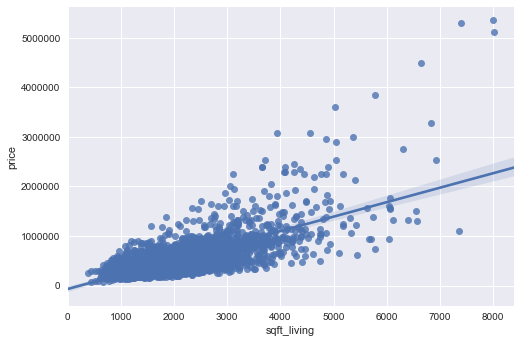

In [15]:
seaborn.regplot(x="sqft_living", y="price", data=df)

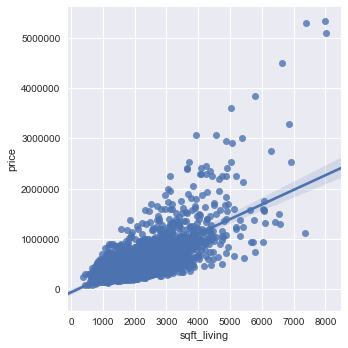

In [16]:
seaborn.lmplot(x="sqft_living", y="price", data=df)

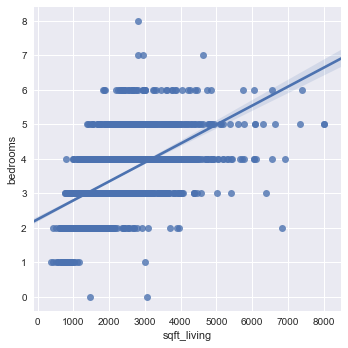

In [17]:
seaborn.lmplot(x="sqft_living", y="bedrooms", data=df) # Try adding y_jitter=.05

### Fitting different kinds of models

In [18]:
import pandas as pd
anscombe_df = pd.read_csv('anscombe.csv')
anscombe_df

,x1,x2,x3,x4,y1,y2,y3,y4
0,10,10,10,8,8.04,9.14,7.46,6.58
1,8,8,8,8,6.95,8.14,6.77,5.76
2,13,13,13,8,7.58,8.74,12.74,7.71
3,9,9,9,8,8.81,8.77,7.11,8.84
4,11,11,11,8,8.33,9.26,7.81,8.47
5,14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,6,8,7.24,6.13,6.08,5.25
7,4,4,4,19,4.26,3.10,5.39,12.50
8,12,12,12,8,10.84,9.13,8.15,5.56
9,7,7,7,8,4.82,7.26,6.42,7.91


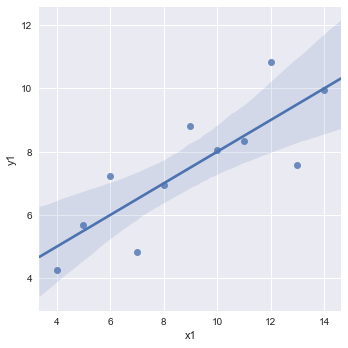

In [19]:
seaborn.lmplot(x="x1", y="y1", data=anscombe_df) # liner is good enough.

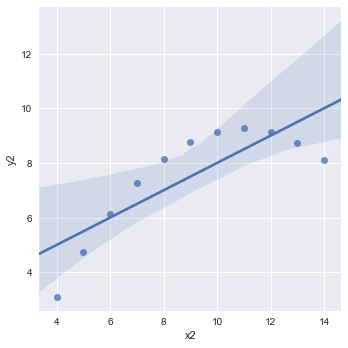

In [20]:
seaborn.lmplot(x="x2", y="y2", data=anscombe_df) # not good, we need polynomial regression.

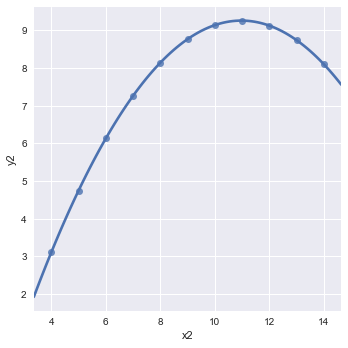

In [21]:
seaborn.lmplot(x="x2", y="y2", data=anscombe_df, order=2) # fit

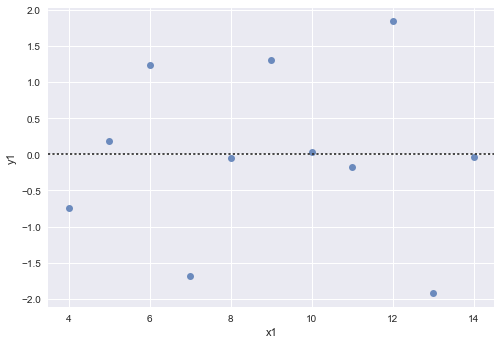

In [22]:
'''
The residplot() function can be a useful tool
for checking whether the simple regression model is appropriate for a dataset.
It fits and removes a simple linear regression
and then plots the residual values for each observation.
Ideally, these values should be randomly scattered around y = 0:
'''
seaborn.residplot(x="x1", y="y1", data=anscombe_df) # Try x1,y1 and x2,y2

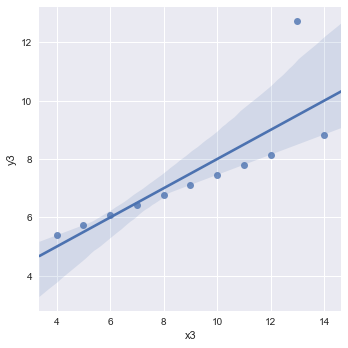

In [23]:
seaborn.lmplot(x="x3", y="y3", data=anscombe_df) # outliers!

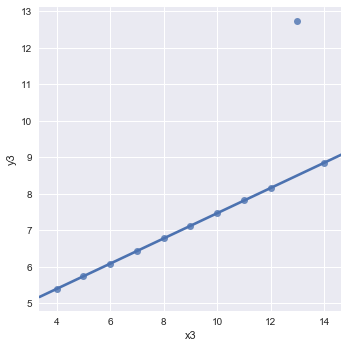

In [24]:
# In the presence of outliers, it can be useful to fit a robust regression,
# which uses a different loss function to downweight relatively large residuals.

seaborn.lmplot(x="x3", y="y3", data=anscombe_df, robust=True, ci=None)

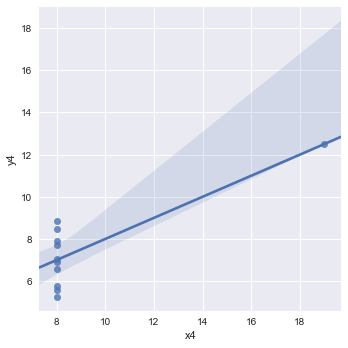

In [25]:
seaborn.lmplot(x="x4", y="y4", data=anscombe_df)

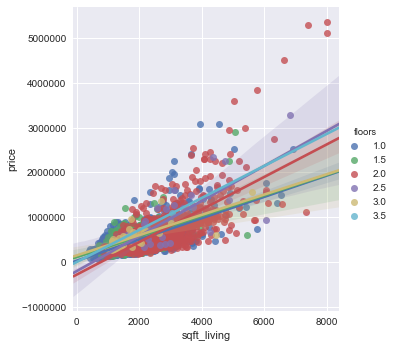

In [26]:
seaborn.lmplot(x="sqft_living", y="price", data=df, hue="floors")